# Hoy : Analisando el contenido del carrito del supermercado

Uno de los primeros problemas estudiados con mineria de datos es el del carrito de supermercado, que consiste en analizar que comprán las personas. Esto fue posible porque a partir de 1980 los supermercados implementan puntos de venta (POS) computarizados.


In [ ]:
# Importamos lo de siempre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# cargo los datos desde una url publica.
url = 'https://dmontero.org/mineria/datasets/Market_Basket_Optimisation.csv'
df = pd.read_csv(url, header = None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ¿Cuántas filas tengo?
df.shape[0]

7501

Quiero convertir las filas de este dataset en una estructura que sea homogenea; esto es que todas las filas tengan el mismo largo.

Para esto voy a usar una biblioteca que hace la transformación -> TransactionEncoder

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Este es un problema frecuente:
# Hay cosas que requieren que los datos vengan en un arreglo de numpy y
# no en un dataframe de pandas, por lo que tengo que hacer la conversión.
arr = []
for i in range(df.shape[0]): # para cada fila
  arr.append([str(df.values[i,j]) for j in range(df.shape[1])]) # agregamos todas las columnas

arr = np.array(arr)
arr.shape

(7501, 20)

In [ ]:
# ahora si, convierto a la estructura regular en que true significa
# un producto esta presente en una canasta y false que no lo está
encoder = TransactionEncoder()
datos = encoder.fit_transform(arr)
datos = pd.DataFrame(datos, columns = encoder.columns_) # vuelvo todo un dataframe
print(datos.shape)
datos.head()



(7501, 121)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# El conjunto original estana lleno de NaN, pero NaN no es un producto;
# simplemente significaba que ese espacio en el carrito de compra estaba vacio.
# Por eso voy a eliminar la columna del NaN
datos = datos.drop(columns = ['nan'])
print(datos.shape)
datos.head()

(7501, 120)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Para analizar carritos de compra, una metrica muy sencilla se llama 'Support'. Se calcula dividiendo el número de veces que aparece un producto (o una combinación de productos) por el total de transacciones.

Para hacer este calculo podemos usar una biblioteca, con la función apriori.

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Consideramos solo frecuencias sobre el 2%.
frecuencias = apriori(datos, min_support = 0.02 , use_colnames = True)

frecuencias

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(mineral water, whole wheat rice)"
99,0.022930,"(spaghetti, olive oil)"
100,0.025197,"(pancakes, spaghetti)"
101,0.021197,"(spaghetti, shrimp)"


In [ ]:
# voy a ordenar por Support....
frecuencias_ordenadas = frecuencias.sort_values(by ='support', ascending = False)
frecuencias_ordenadas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
34,0.238368,(mineral water)
13,0.179709,(eggs)
44,0.174110,(spaghetti)
17,0.170911,(french fries)
9,0.163845,(chocolate)
...,...,...
0,0.020397,(almonds)
80,0.020264,"(mineral water, frozen smoothie)"
98,0.020131,"(mineral water, whole wheat rice)"
78,0.020131,"(pancakes, french fries)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                             itemsets   support
34                    (mineral water)  0.238368
13                             (eggs)  0.179709
44                        (spaghetti)  0.174110
17                     (french fries)  0.170911
9                         (chocolate)  0.163845
..                                ...       ...
0                           (almonds)  0.020397
80   (mineral water, frozen smoothie)  0.020264
98  (mineral water, whole wheat rice)  0.020131
78           (pancakes, french fries)  0.020131
67       (mineral water, cooking oil)  0.020131

[103 rows x 2 columns]


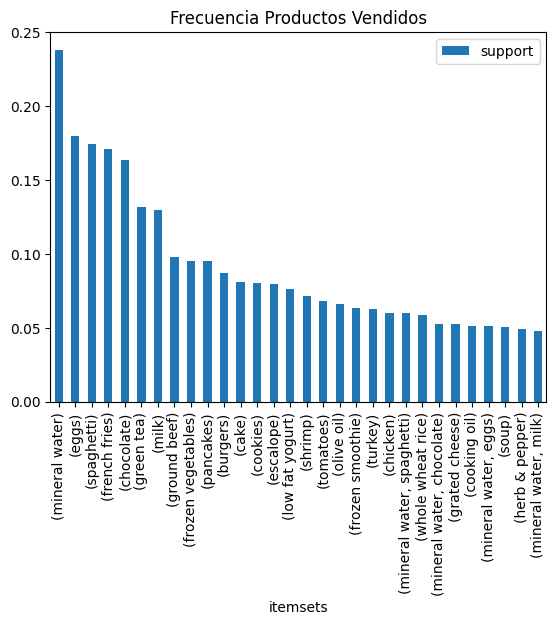

In [ ]:
# voy a graficar los primeros 30 productos o combinaciones más vendidas

tope = 30
frecuencias_grafico = frecuencias_ordenadas[['itemsets', 'support']].copy()
print(frecuencias_grafico)
ax = frecuencias_grafico.head(tope).plot.bar(x='itemsets', y='support', rot=180)
plt.xticks(rotation = 'vertical')
plt.title('Frecuencia Productos Vendidos')
plt.xlabel('itemsets')
#plt.axis('on')
plt.show()

Me interesa ver las combinaciones de productos;
para eso voy a agregar una nueva columna, y luego la voy a usar para filtrar.

In [ ]:
frecuencias_ordenadas['largo'] = frecuencias_ordenadas['itemsets'].apply(lambda x : len(x))
frecuencias_ordenadas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,largo
34,0.238368,(mineral water),1
13,0.179709,(eggs),1
44,0.174110,(spaghetti),1
17,0.170911,(french fries),1
9,0.163845,(chocolate),1
...,...,...,...
0,0.020397,(almonds),1
80,0.020264,"(mineral water, frozen smoothie)",2
98,0.020131,"(mineral water, whole wheat rice)",2
78,0.020131,"(pancakes, french fries)",2


In [ ]:
# ahora filtramos...
combinaciones = frecuencias_ordenadas.loc[frecuencias_ordenadas['largo'] > 1]
combinaciones

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,largo
96,0.059725,"(mineral water, spaghetti)",2
65,0.052660,"(mineral water, chocolate)",2
72,0.050927,"(mineral water, eggs)",2
90,0.047994,"(mineral water, milk)",2
87,0.040928,"(mineral water, ground beef)",2
88,0.039195,"(ground beef, spaghetti)",2
66,0.039195,"(chocolate, spaghetti)",2
74,0.036528,"(eggs, spaghetti)",2
68,0.036395,"(eggs, french fries)",2
82,0.035729,"(mineral water, frozen vegetables)",2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                               itemsets   support
96           (mineral water, spaghetti)  0.059725
65           (mineral water, chocolate)  0.052660
72                (mineral water, eggs)  0.050927
90                (mineral water, milk)  0.047994
87         (mineral water, ground beef)  0.040928
88             (ground beef, spaghetti)  0.039195
66               (chocolate, spaghetti)  0.039195
74                    (eggs, spaghetti)  0.036528
68                 (eggs, french fries)  0.036395
82   (mineral water, frozen vegetables)  0.035729
91                    (milk, spaghetti)  0.035462
60            (chocolate, french fries)  0.034395
77        (mineral water, french fries)  0.033729
93            (mineral water, pancakes)  0.033729
59                    (eggs, chocolate)  0.033196
64                    (milk, chocolate)  0.032129
84           (mineral water, green tea)  0.031063
71                         (eggs, milk)  0.030796
53                      (eggs, burgers)  0.028796


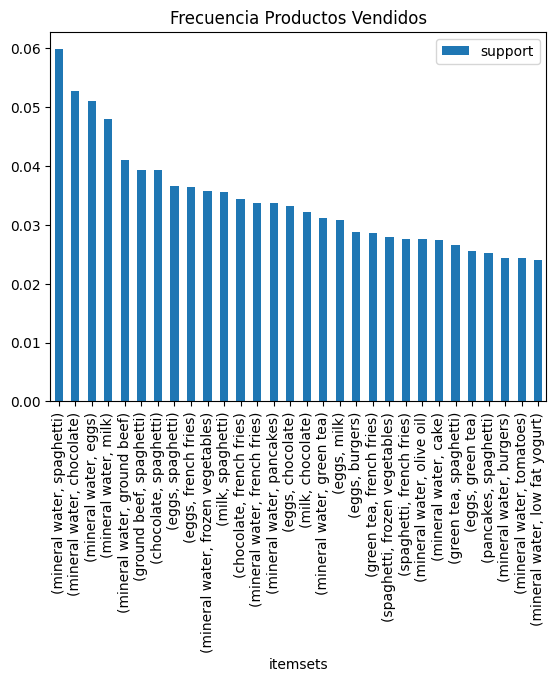

In [ ]:
# veamos el gráfico con las combinaciones

tope = 30
frecuencias_grafico = combinaciones[['itemsets', 'support']].copy()
print(frecuencias_grafico)
ax = frecuencias_grafico.head(tope).plot.bar(x='itemsets', y='support', rot=180)
plt.xticks(rotation = 'vertical')
plt.title('Frecuencia Productos Vendidos')
plt.xlabel('itemsets')
#plt.axis('on')
plt.show()